<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
data = pickle.load(open('../../data_final/JJarrayCPW_pkl1.pkl','rb'))
data.keys()

dict_keys(['N ()', 'l (m)', 'l0 (m)', 'Lambda (%)', 'Anh (Hz)'])

In [4]:
dpi = 1000
figtextsize=10

In [5]:
import matplotlib
import matplotlib.ticker as ticker
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


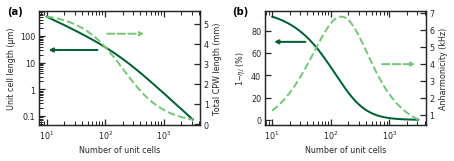

In [6]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6, 5.3))
gs = gridspec.GridSpec(1, 2, wspace=0.4)

axa = fig.add_subplot(gs[0, 0])
plt.plot(data['N ()'],
         data['l (m)'] / 1e-6,
         '-',
         markerfacecolor='none',
         c=cmap(0.1),
         zorder=-1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of unit cells')
plt.ylabel('Unit cell length (µm)')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, pos: ('{{:.{:1d}f}}'.format(
        int(np.maximum(-np.log10(y), 0)))).format(y)))
alims = plt.gca().get_ylim()
plt.annotate("",
             xytext=(10, 30),
             xy=(80, 30),
             arrowprops=dict(arrowstyle="<-", color=cmap(0.1), linewidth=2))
axa2 = plt.twinx(axa)
plt.plot(data['N ()'],
         data['l0 (m)'] / 1e-3,
         '--',
         markerfacecolor='none',
         c=cmap(0.5),
         zorder=-1)
plt.ylabel('Total CPW length (mm)')
plt.annotate("",
             xytext=(1e2, 4.5),
             xy=(5e2, 4.5),
             arrowprops=dict(arrowstyle="->",
                             color=cmap(0.5),
                             linestyle='--',
                             linewidth=2))

axb = fig.add_subplot(gs[0, 1])
plt.plot(data['N ()'],
         data['Lambda (%)'],
         '-',
         markerfacecolor='none',
         c=cmap(0.1),
         zorder=-1)
plt.xscale('log')
plt.xlabel('Number of unit cells')
plt.ylabel(r'1$-\eta_J$ (%)')
plt.annotate("",
             xytext=(10, 70),
             xy=(40, 70),
             arrowprops=dict(arrowstyle="<-", color=cmap(0.1), linewidth=2))
axb2 = plt.twinx(axb)
plt.plot(data['N ()'],
         data['Anh (Hz)'] / 1e3,
         '--',
         markerfacecolor='none',
         c=cmap(0.5),
         zorder=-1)
plt.ylabel('Anharmonicity (kHz)')
plt.annotate("",
             xytext=(7e2, 4),
             xy=(3e3, 4),
             arrowprops=dict(arrowstyle="->",
                             color=cmap(0.5),
                             linestyle='--',
                             linewidth=2))

axa.text(-0.15,
         1,
         '(a)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axa.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axb.text(-0.15,
         1,
         '(b)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axb.transAxes,
         verticalalignment='center',
         horizontalalignment='center')

plt.savefig('SM_JJarrayCPW_vs_N.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()